In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
path = '/gdrive/My Drive/ML:March2020/Assignments/data/'
data= pd.read_csv(path+'Insurance case study.csv')
data.head()

,Respon-dent,Concept Rating,Current Insurance Supplier,Age,Marital Status,Number of Cars,Average Age of Car(s),Number of Trips,Unnamed: 8
0,1,4,General Insurance,42,M,1,0.5,3,NaN
1,2,3,General Insurance,39,M,1,1.5,1,NaN
2,3,5,General Insurance,47,M,1,1.0,4,NaN
3,4,2,General Insurance,24,S,3,1.0,2,NaN
4,5,4,General Insurance,43,M,2,1.5,4,NaN


In [ ]:
data.shape

(60, 9)

In [ ]:
data.dtypes

Respon-dent                      int64
Concept Rating                   int64
Current Insurance Supplier      object
Age                              int64
Marital Status                  object
Number of Cars                   int64
Average Age of Car(s)          float64
Number of Trips                  int64
Unnamed: 8                     float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Respon-dent                  60 non-null     int64  
 1   Concept Rating               60 non-null     int64  
 2   Current Insurance Supplier   60 non-null     object 
 3   Age                          60 non-null     int64  
 4   Marital Status               60 non-null     object 
 5   Number of Cars               60 non-null     int64  
 6   Average Age of Car(s)        60 non-null     float64
 7   Number of Trips              60 non-null     int64  
 8   Unnamed: 8                   0 non-null      float64
dtypes: float64(2), int64(5), object(2)
memory usage: 4.3+ KB


Apart from column #1 and #8, we have 5 numerical features and 2 categorical features


In [ ]:
#Removing column 1 & 8
cols = [0,8]
data=data.drop(data.columns[cols], axis=1)
data.head()


,Concept Rating,Current Insurance Supplier,Age,Marital Status,Number of Cars,Average Age of Car(s),Number of Trips
0,4,General Insurance,42,M,1,0.5,3
1,3,General Insurance,39,M,1,1.5,1
2,5,General Insurance,47,M,1,1.0,4
3,2,General Insurance,24,S,3,1.0,2
4,4,General Insurance,43,M,2,1.5,4


In [ ]:
data.shape

(60, 7)

In [ ]:
data.describe()

,Concept Rating,Age,Number of Cars,Average Age of Car(s),Number of Trips
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.066667,36.766667,1.666667,1.761667,2.033333
std,1.351291,10.152009,0.968428,0.857092,2.123051
min,1.000000,22.000000,1.000000,0.400000,0.000000
25%,2.000000,28.000000,1.000000,1.000000,0.000000
50%,3.000000,37.000000,1.000000,2.000000,1.500000
75%,4.000000,43.000000,2.000000,2.000000,3.000000
max,5.000000,62.000000,5.000000,4.500000,8.000000


In [ ]:
data.columns

Index(['Concept Rating ', 'Current Insurance Supplier ', 'Age',
       'Marital Status ', 'Number of Cars', 'Average Age of Car(s)',
       'Number of Trips'],
      dtype='object')

**Univariate Analysis:**

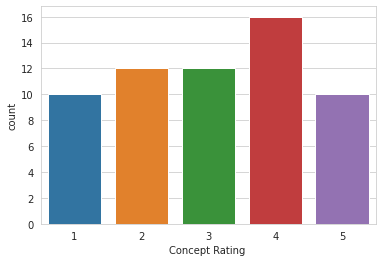

In [ ]:
sns.countplot(data['Concept Rating '])

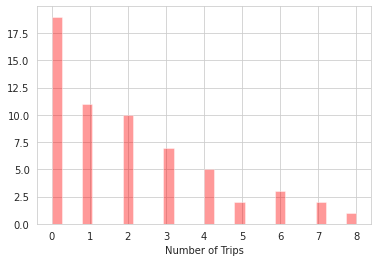

In [ ]:
sns.set_style('whitegrid')
sns.distplot(data['Number of Trips'], kde=False, color ='red', bins=30)

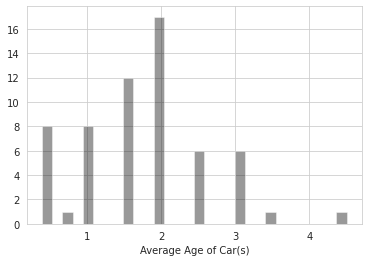

In [ ]:
sns.set_style('whitegrid')
sns.distplot(data['Average Age of Car(s)'], kde=False, color ='black', bins=30)

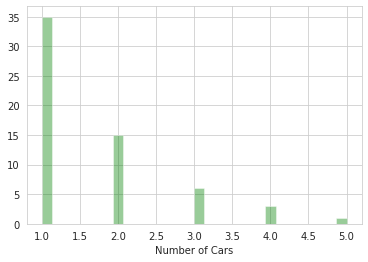

In [ ]:
sns.set_style('whitegrid')
sns.distplot(data['Number of Cars'], kde=False, color ='green', bins=30)

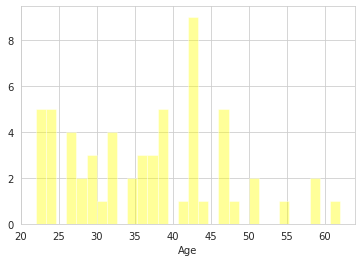

In [ ]:
sns.set_style('whitegrid')
sns.distplot(data['Age'], kde=False, color ='yellow', bins=30)

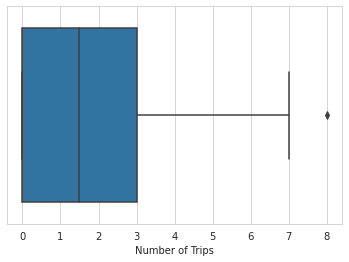

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x='Number of Trips', data=data)

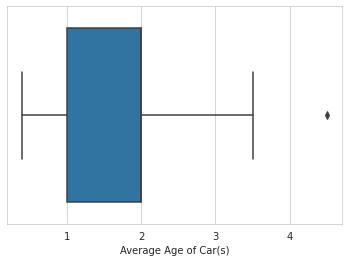

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x='Average Age of Car(s)', data=data)

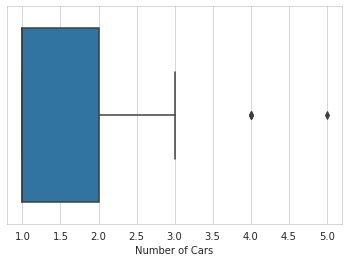

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x='Number of Cars', data=data)

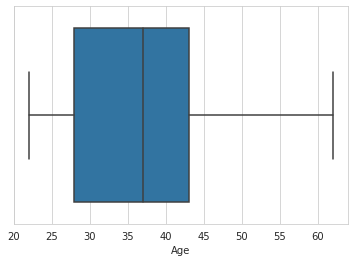

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x='Age', data=data)

**Bivariate Analysis**

In [ ]:
pd.crosstab(data['Concept Rating '], data['Current Insurance Supplier '])

Current Insurance Supplier,General Insurance,Other
Concept Rating,,
1,4,6
2,2,10
3,6,6
4,11,5
5,7,3


In [ ]:
pd.crosstab(data['Concept Rating '], data['Marital Status '])

Marital Status,M,S
Concept Rating,,
1,4,6
2,5,7
3,8,4
4,14,2
5,9,1


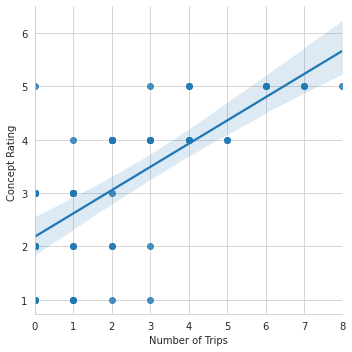

In [ ]:
sns.lmplot(x='Number of Trips', y='Concept Rating ', data=data)

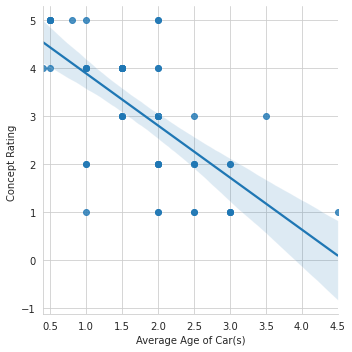

In [ ]:
sns.lmplot(x='Average Age of Car(s)', y='Concept Rating ', data=data)

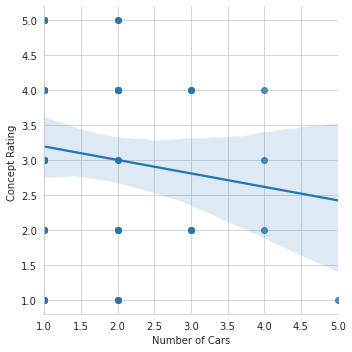

In [ ]:
sns.lmplot(x='Number of Cars', y='Concept Rating ', data=data)

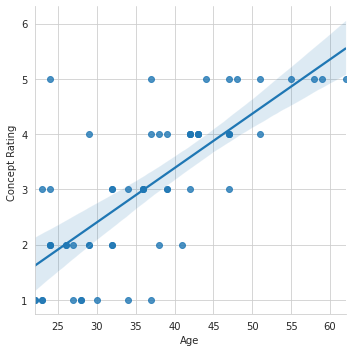

In [ ]:
sns.lmplot(x='Age', y='Concept Rating ', data=data)

**Adding Feature**

In [ ]:
data['Avg Trips'] = data['Number of Trips'] / data['Number of Cars'] 
data.head()
#To know how concept rating was affected by how often a car was  (Assumed- Number of trips is cumaltive of all the cars)

,Concept Rating,Current Insurance Supplier,Age,Marital Status,Number of Cars,Average Age of Car(s),Number of Trips,Avg Trips
0,4,General Insurance,42,M,1,0.5,3,3.000000
1,3,General Insurance,39,M,1,1.5,1,1.000000
2,5,General Insurance,47,M,1,1.0,4,4.000000
3,2,General Insurance,24,S,3,1.0,2,0.666667
4,4,General Insurance,43,M,2,1.5,4,2.000000


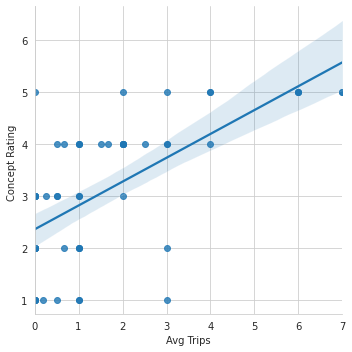

In [ ]:
sns.lmplot(x='Avg Trips', y='Concept Rating ', data=data)

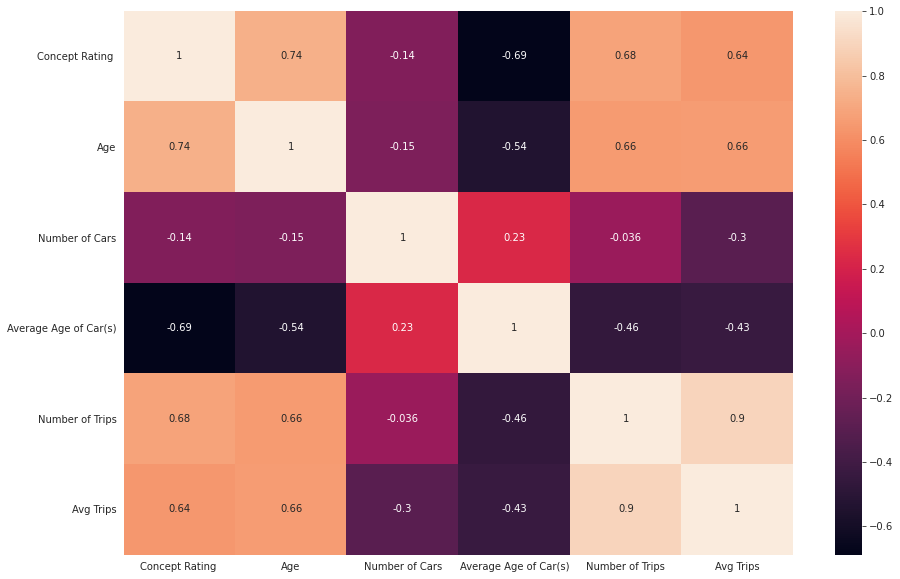

In [ ]:
plt.figure(figsize=(15,10))
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True);

1.Age and number of trips have strong positive correlation with concept    rating
2.Average age of cars has a strong negative correlation  
3.Number of cars has a negligible correlation   




**Observations:**

1.Age and number of trips have strong positive correlation with concept rating 2.Average age of cars has a strong negative correlation. So people with new car are more likely to support this
3.Number of cars has a negligible correlation
4.Avg trip has a positive correlation- So the more one uses a car, more likely he is to give a good rating 
5.Married people are more likely to give a good rating
6.And people currently having General insurance are more likely to endorse the new concept


**Recommendations:**
1. Target market: married, older people(35+) with regular car usage, preferably ones currenlty having the general insurance and with a new car 

2. Marketing strategy: -Reaching out to people who buy new cars through dealers
- Marketing in specific places- highway restaurants, highway petrol bunks

3. -Research has to be conducted on a bigger population(Age group, age of cars).
   -Availability of similar insurance policies
   -General expectations of people and the reason if they give a low rating